# Chapter 9. Plotting and Visualization

## 9.1 A brief matplotlib API primer

In [69]:
%matplotlib inline

In [70]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

np.random.seed(0)

plt.style.use('seaborn-whitegrid')
plt.rc('figure', figsize=(8, 5), facecolor='white')

In [71]:
data  = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

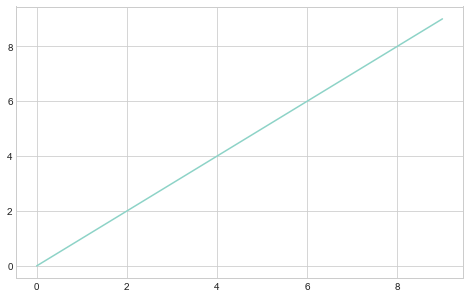

In [72]:
plt.plot(data)

### Figures and subplots

Plots reside in a `Figure` object.
One or more subplots must be added.
Below, a 2x2 grid is created and the first subplot is set to `ax1`, the second to `ax2`, etc.

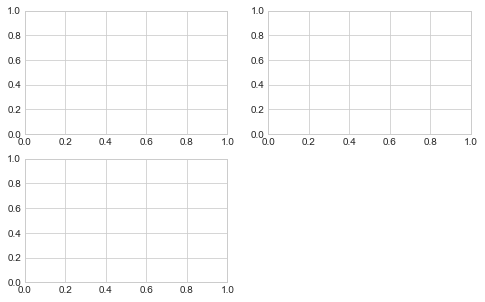

In [73]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

When a plotting command is issued, such as `plt.plot([1.5, 3.5, -2, 1.6])`, the last figure and subplot used is drawn to.

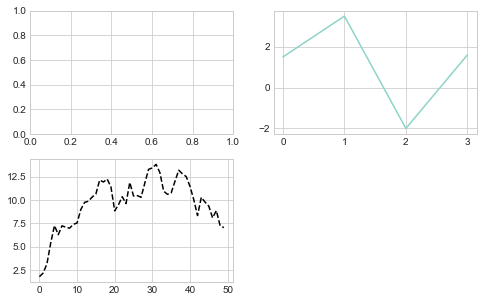

In [74]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)

ax2 = fig.add_subplot(2, 2, 2)
plt.plot([1.5, 3.5, -2, 1.6])

ax3 = fig.add_subplot(2, 2, 3)
plt.plot(np.random.randn(50).cumsum(), 'k--')

Alternatively, the objects returned by `fig.add_subplot()` can be added to directly.

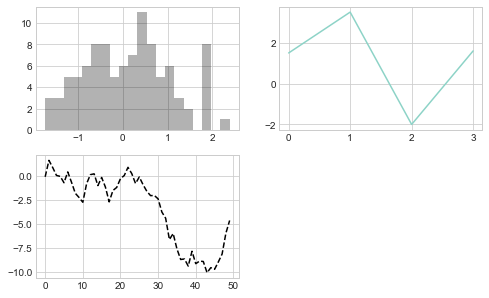

In [75]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)

ax2 = fig.add_subplot(2, 2, 2)
plt.plot([1.5, 3.5, -2, 1.6])

ax3 = fig.add_subplot(2, 2, 3)
plt.plot(np.random.randn(50).cumsum(), 'k--')

The author mentions that there are options in `fig.subplot` to declare that some subplots should have the same axes.
An example is shown in the next section.
The trick is to work on the `axes` array that is returned by `plt.subplots()`.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a38a17d10>,
      dtype=object)

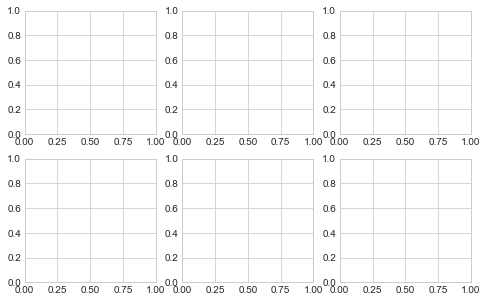

In [76]:
fig, axes = plt.subplots(2, 3)
axes

### Adjusting the spacing around subplots

All of the spacing is specified relative to the height and width of the plot.

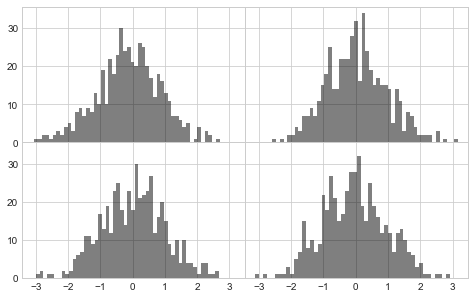

In [77]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

### Colors, markers, and line styles

The color and linestyle can be specified together or separately:

```python
ax.plot(x, y, 'g--')
ax.plot(x, y, linestyle='--', color='g')
```

Any color can be specified by its hex code.

Markers can also be used to highlight the data points.

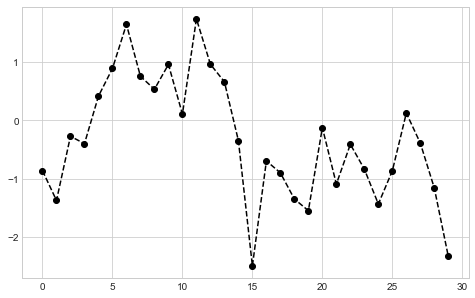

In [78]:
plt.plot(np.random.randn(30).cumsum(), 'ko--')

Which is equivalent to the more verbose statement below.

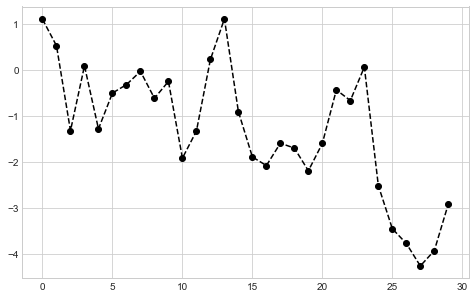

In [79]:
plt.plot(np.random.randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

The type of interpolation between points on a line plot can be specified; the default is `'linear'`.

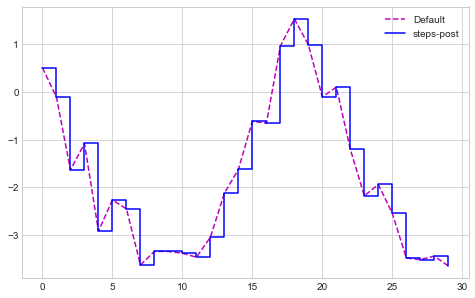

In [80]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'm--', label='Default')
plt.plot(data, 'b-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

Ticks, labels, and legends

The general interactive API used for *pyplot* uses methods like `xlim()`, `xticks()`, and `xticklabels()` in two ways:

1. called with no paramters, the current values are returned,
2. called with paramteres, the values are set.

All such methods act on the active or most recently created `AxesSubplot` object.
These two methods actaully refer to two different methods on the subplot object, such as `ax.get_xlim()` and `ax.set_xlim()` - it is often recommended to explicitly use these.

Text(0.5, 0, 'Stages')

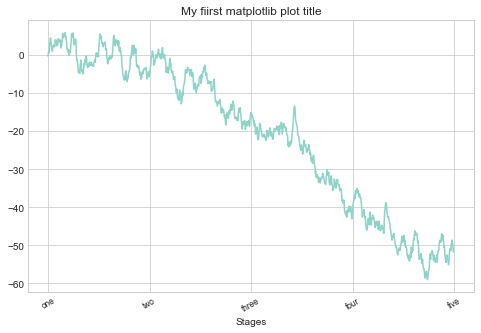

In [81]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30,
                            fontsize='small')
ax.set_title('My fiirst matplotlib plot title')
ax.set_xlabel('Stages')

The easiest way of creating a legend is to pass a `label` argument to each plot.

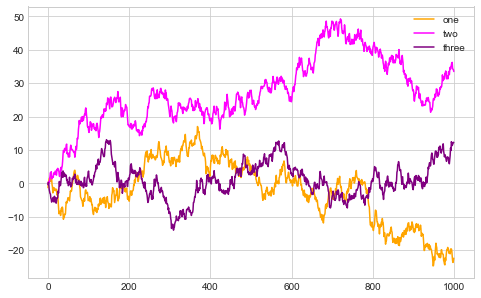

In [82]:
def make_random_data(n=1000):
    return np.random.randn(n).cumsum()

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(make_random_data(), 'orange', label='one')
ax.plot(make_random_data(), 'magenta', label='two')
ax.plot(make_random_data(), 'purple', label='three')
ax.legend(loc='best')

### Annotations and drawing on a subplot

Annotations can inclde text, arrows, or other shapes.
Some of the more common functions for such annotations include `text()`, `arrow()`, and `annotate()`.

For an example, the author plots the S&P 500 closing prices since 2007 and adds some annotations for important dates of the 2008 financial crisis.

In [83]:
from datetime import datetime

data = pd.read_csv('assets/examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']
spx.head()

1990-02-01    328.79
1990-02-02    330.92
1990-02-05    331.85
1990-02-06    329.66
1990-02-07    333.75
Name: SPX, dtype: float64

In [84]:
crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]
crisis_data

[(datetime.datetime(2007, 10, 11, 0, 0), 'Peak of bull market'),
 (datetime.datetime(2008, 3, 12, 0, 0), 'Bear Stearns Fails'),
 (datetime.datetime(2008, 9, 15, 0, 0), 'Lehman Bankruptcy')]

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

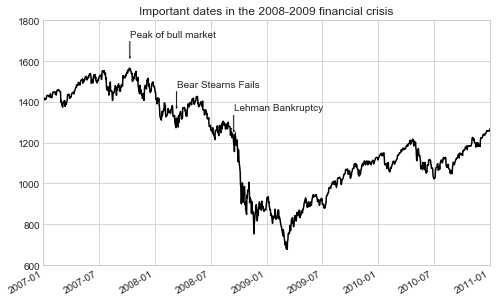

In [85]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

spx.plot(ax=ax, style='k-')

arrow_styling = {
    'facecolor': 'black', 
    'headwidth': 4, 
    'width': 2, 
    'headlength': 4
}

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 50),
                xytext=(date, spx.asof(date) + 200),
                arrowprops=arrow_styling,
                horizontalalignment='left', verticalalignment='top')

ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

### Saving plots to file

Use the `plt.savefig('filepath.svg')` method.

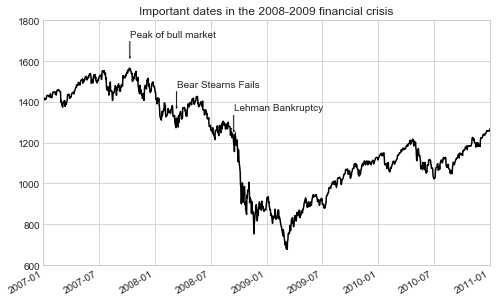

In [86]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

spx.plot(ax=ax, style='k-')

arrow_styling = {
    'facecolor': 'black', 
    'headwidth': 4, 
    'width': 2, 
    'headlength': 4
}

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 50),
                xytext=(date, spx.asof(date) + 200),
                arrowprops=arrow_styling,
                horizontalalignment='left', verticalalignment='top')

ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

plt.savefig('assets/output/financial_crisis_annotated_plot.svg', facecolor='white')

### matplotlib configuration

Most default behavior can be customized via an extensive set of global parameters.
The default plot size can be set like so.

The first argument is the component to be customized, followed by a sequence of keyward arguments indicating the new parameter values.

```python
font_options = {
    'family': 'monospace',
    'weight': 'bold',
    'size': 'small'
}
plt.rc('font', **font_options)
```

## 9.2 Plotting with pandas and seaborn

Seaborn is a statistical graphics library aimed at simplifying many common visualization types.

### Line plots

Both Series and DataFrame have `plot` attributes to create some basic plot types.
By default, `plot()` creates a line plot.

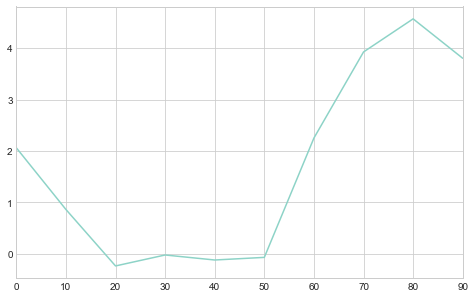

In [87]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

Most of the pandas plotting methods accept a matplotlib subplot object through an optional `ax` parameter.
The `plot()` method for DataFrame makes line plot out of each column.

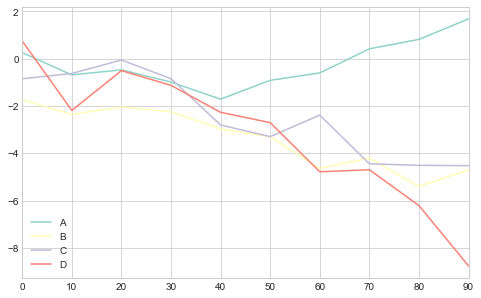

In [88]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df.plot()

### Bar plots

The `plot.bar()` and `plot.barh()` make vertical and horizontal bar plots.

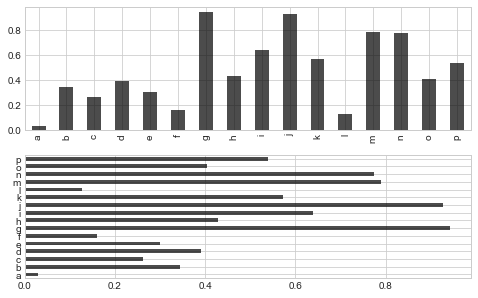

In [89]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

A DataFrame bar plot groups the values of rows together.

In [90]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.424886,0.224244,0.762922,0.744435
two,0.647056,0.455640,0.464806,0.298444
three,0.265725,0.848971,0.859374,0.015345
four,0.719606,0.329922,0.919347,0.242120
five,0.335403,0.747336,0.074099,0.708039
six,0.674679,0.304022,0.712769,0.902925


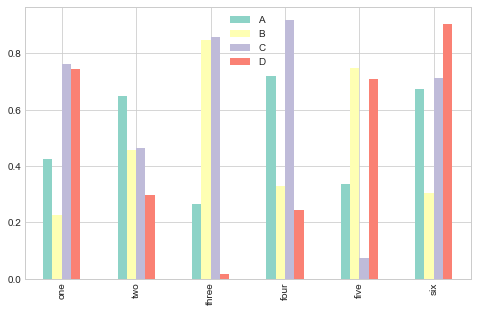

In [91]:
df.plot.bar()
plt.legend(loc='best')

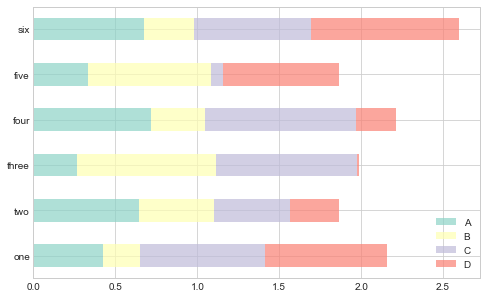

In [92]:
df.plot.barh(stacked=True, alpha=0.7)
plt.legend(loc='best')

The author uses the tipping data as an example of plotting.

In [93]:
tips = pd.read_csv('assets/examples/tips.csv')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [94]:
# Number of group-size per day.
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [95]:
# Normalize to sum to 1.
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

size,1,2,3,4,5,6
day,,,,,,
Fri,0.052632,0.842105,0.052632,0.052632,0.000000,0.000000
Sat,0.022989,0.609195,0.206897,0.149425,0.011494,0.000000
Sun,0.000000,0.513158,0.197368,0.236842,0.039474,0.013158
Thur,0.016129,0.774194,0.064516,0.080645,0.016129,0.048387


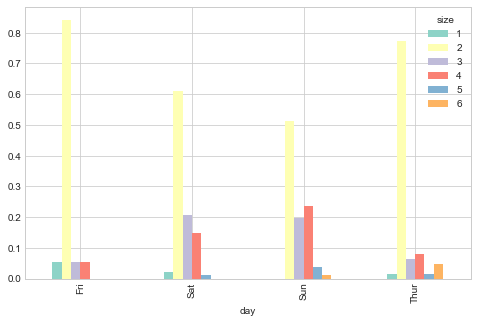

In [97]:
party_pcts.plot.bar()

The seaborn library can be useful for making comparisons.
The following is an example looking at the average percent of the bill used for the tip per day of the week.

In [98]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


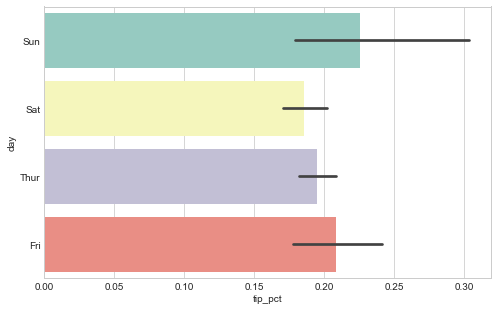

In [99]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

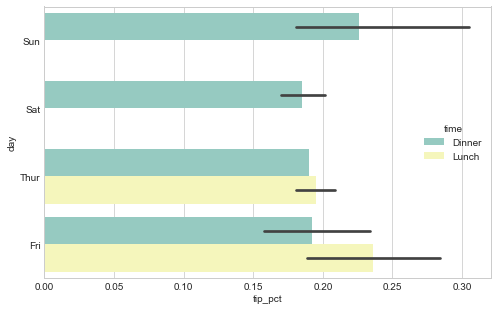

In [100]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

### Histograms and density plots

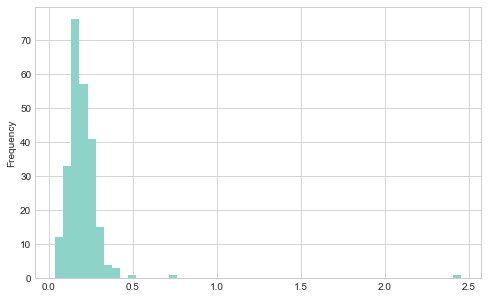

In [101]:
tips['tip_pct'].plot.hist(bins=50)

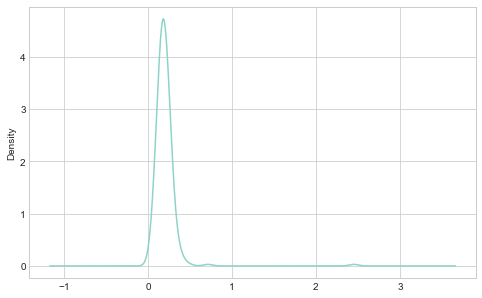

In [102]:
tips['tip_pct'].plot.density()

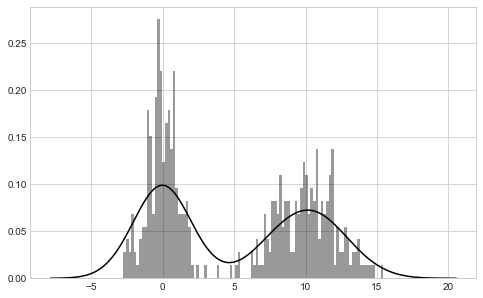

In [104]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')

### Scatter or point plots

In [107]:
macro = pd.read_csv('assets/examples/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
data.head()

,cpi,m1,tbilrate,unemp
0,28.98,139.7,2.82,5.8
1,29.15,141.7,3.08,5.1
2,29.35,140.5,3.82,5.3
3,29.37,140.0,4.33,5.6
4,29.54,139.6,3.50,5.2


In [108]:
trans_data = np.log(data).diff().dropna()
trans_data.head()

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
5,0.000338,0.004289,-0.266946,0.000000


Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

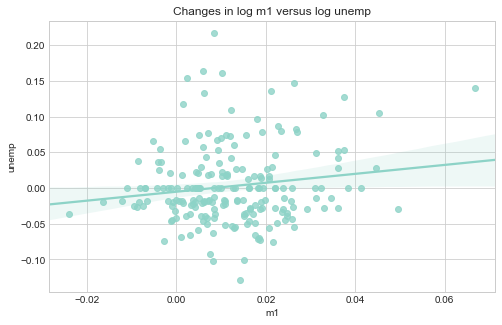

In [113]:
sns.regplot('m1', 'unemp', data=trans_data)
plt.title(f'Changes in log m1 versus log unemp')

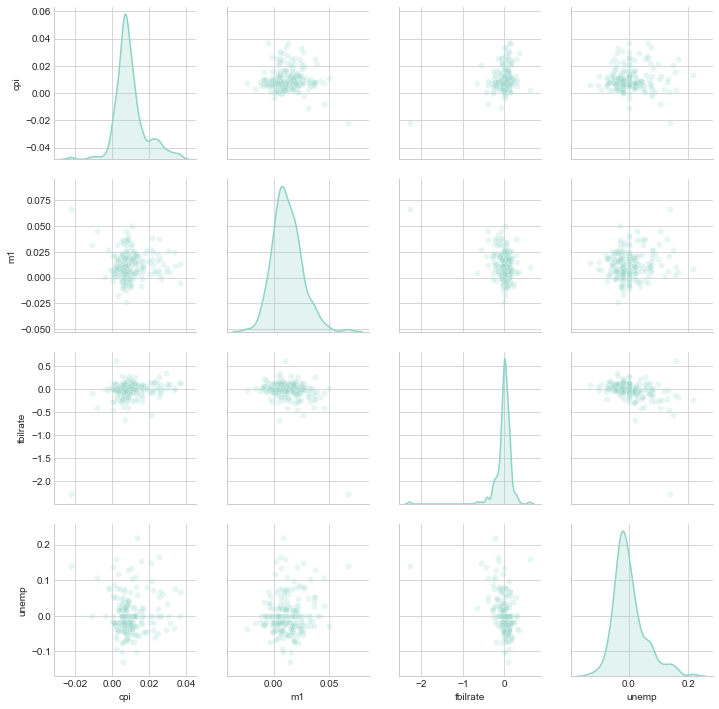

In [114]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

### Facet grids and categorical data

The seaborn library has `factorplot()` for faceting plots.

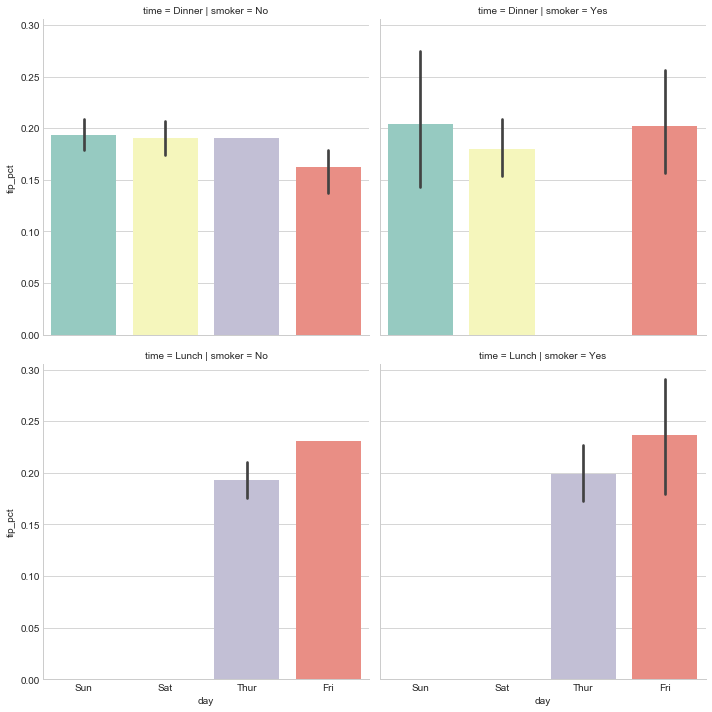

In [118]:
sns.catplot(x='day', y='tip_pct',
            row='time', col='smoker',
            kind='bar',
            data=tips[tips.tip_pct < 1])

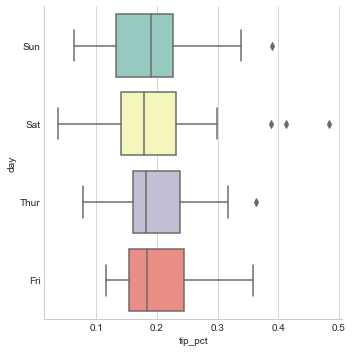

In [119]:
sns.catplot(x='tip_pct', y='day',
            kind='box',
            data=tips[tips.tip_pct < 0.5])